In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# #графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'png'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3


In [2]:
data=pd.read_csv("./descriptive_stats/clients.csv")

In [3]:
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [4]:
#посмотрим на пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [5]:
data.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

In [5]:
data = data.dropna()
print(data.shape)

(164, 25)


переименуем колонки, чтобы они не содержали пробелов до и после имен

In [6]:
columns_list=[x.strip() for x in data.columns]
columns_list

['ID',
 'Building',
 'Year of sale',
 'Month of sale',
 'Type of property',
 'Property number',
 'Area (ft.)',
 'Price',
 'Status',
 'Customer ID',
 'Entity',
 'Name',
 'Surname',
 'Age at time of purchase',
 'Age Interval',
 'Y',
 'M',
 'D',
 'Gender',
 'Country',
 'State',
 'Purpose',
 'Deal satisfaction',
 'Mortgage',
 'Source']

In [7]:
columns_dict= {}
for key in range(len(data.columns)):
    columns_dict[data.columns.values[key]]=columns_list[key]

columns_dict

{'ID': 'ID',
 'Building': 'Building',
 'Year of sale': 'Year of sale',
 'Month of sale': 'Month of sale',
 'Type of property': 'Type of property',
 'Property number': 'Property number',
 'Area (ft.)': 'Area (ft.)',
 'Price': 'Price',
 'Status': 'Status',
 'Customer ID': 'Customer ID',
 'Entity': 'Entity',
 'Name': 'Name',
 'Surname': 'Surname',
 'Age at time of purchase': 'Age at time of purchase',
 'Age Interval ': 'Age Interval',
 'Y': 'Y',
 'M': 'M',
 'D': 'D',
 'Gender': 'Gender',
 'Country': 'Country',
 'State': 'State',
 'Purpose': 'Purpose',
 'Deal satisfaction': 'Deal satisfaction',
 'Mortgage': 'Mortgage',
 'Source': 'Source'}

In [8]:
data.rename(columns=columns_dict, inplace=True)
data.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

большинство клиентов мужчины

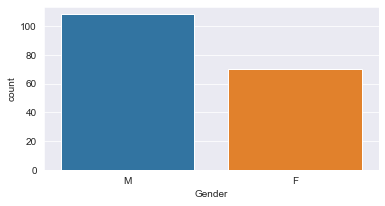

In [9]:
sns.countplot(x="Gender", data=data, order = data['Gender'].value_counts().index);

большинство покупок совершаются в возрасте от 36 до 45 лет

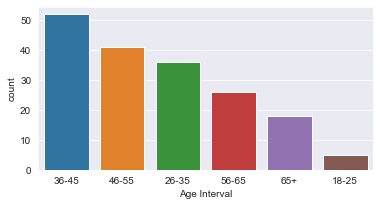

In [10]:
sns.countplot(x='Age Interval', data=data, order=data['Age Interval'].value_counts().index );

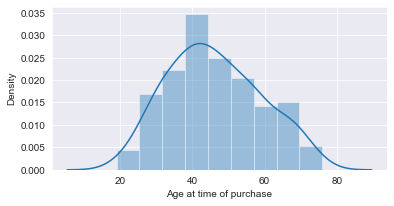

In [11]:
sns.distplot(data['Age at time of purchase']);

In [12]:
#переименуем столбцы Y, M, D на Year, Month, Day
data.rename(columns={"Age at time of purchase":"Age","Area (ft.)":"Area"}, inplace=True)
data.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area', 'Price', 'Status', 'Customer ID', 'Entity',
       'Name', 'Surname', 'Age', 'Age Interval', 'Y', 'M', 'D', 'Gender',
       'Country', 'State', 'Purpose', 'Deal satisfaction', 'Mortgage',
       'Source'],
      dtype='object')

основной покупатель - мужчина от 36 до 45 лет

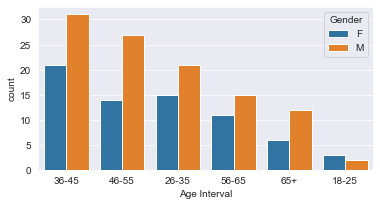

In [13]:
sns.countplot(x="Age Interval", data=data, hue='Gender', order=data['Age Interval'].value_counts().index);

In [14]:
#функция для перевода стоимости в формат числа
def price(x):
    x=x[2:]
    parts=x.split(',')
    first=int(parts[0])*1000
    x=parts[1]
    parts=x.split('.')
    second=int(parts[0])+int(parts[1])*0.01
    return first+second

In [15]:
data['Price']=data['Price'].apply(price)
data['Price'].head()

0    246172.68
1    246331.90
2    209280.91
3    452667.01
4    467083.31
Name: Price, dtype: float64

основная стоимость аренды жилья находится в пределах 200.000-250.000

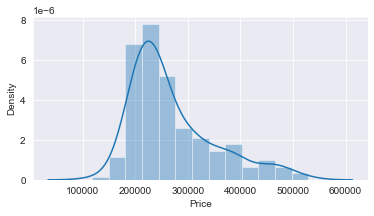

In [16]:
ax = sns.distplot(data['Price'])

тип жилья в основном апартаменты

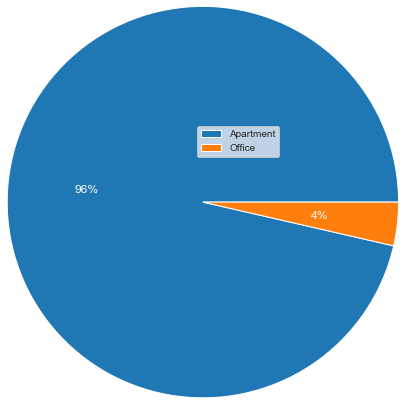

In [17]:
labels=data['Type of property'].value_counts().sort_values(ascending=False).index
patches, texts, autotexts=plt.pie(data['Type of property'].value_counts(), radius=3, autopct='%.0f%%')
plt.tight_layout()
for ins in autotexts:
    ins.set_color('white')

plt.legend(patches, labels, loc="best")
plt.setp(autotexts, size='large')
plt.show()

большинство покупок имеют площадь около 750 футов

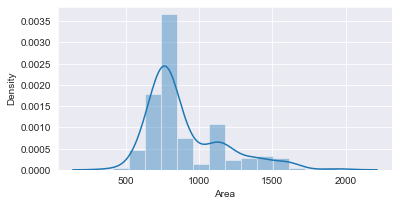

In [18]:
sns.distplot(data['Area']);

основная цель покупки - это жилье

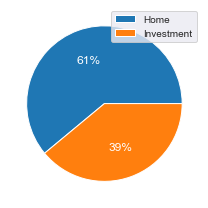

In [19]:
labels=data['Purpose'].value_counts().sort_values(ascending=False).index
patches, texts, autotexts=plt.pie(data['Purpose'].value_counts(), autopct='%.0f%%');
plt.tight_layout()
for ins in autotexts:
    ins.set_color('white')

plt.legend(patches, labels, loc="best")
plt.setp(autotexts, size='large')
plt.show()

для большинства клиентов источником лида был website

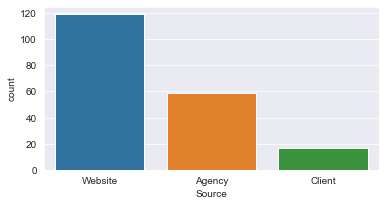

In [20]:
sns.countplot(x='Source', data=data, order=data['Source'].value_counts().index);

У нас несколько стран USA из-за пробелов. Почистим это.

In [21]:
data.Country=data.Country.apply(lambda x: x.strip())
data.Country.value_counts()

USA        177
Canada       7
Russia       4
UK           2
Belgium      2
Denmark      1
Germany      1
Mexico       1
Name: Country, dtype: int64

большинство клиентов из США

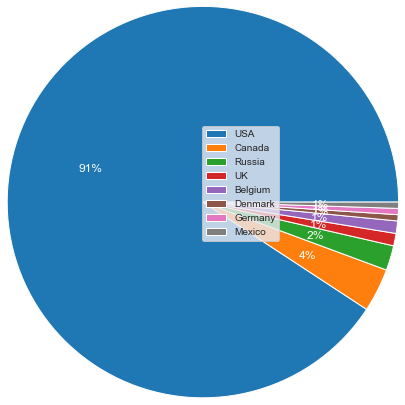

In [22]:
labels=data['Country'].value_counts().sort_values(ascending=False).index
patches, texts, autotexts=plt.pie(data['Country'].value_counts(),radius=3, autopct='%.0f%%');
plt.tight_layout()
for ins in autotexts:
    ins.set_color('white')

plt.legend(labels,loc="best")
plt.setp(autotexts, size='large')
plt.show()

посмотрим, в каких штатах в основном совершались покупки

In [29]:
data_usa_states=data[data['Country']=='USA']['State']

In [30]:
data_usa_states.value_counts()

California    117
Nevada         17
Oregon         11
Colorado       11
Arizona         9
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: State, dtype: int64

большинство клиентов из Калифорнии

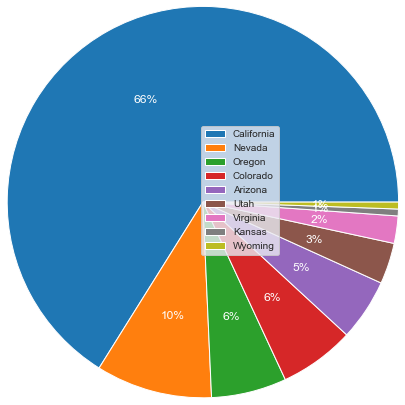

In [31]:
labels=data_usa_states.value_counts().sort_values(ascending=False).index
patches, texts, autotexts=plt.pie(data_usa_states.value_counts(),radius=3, autopct='%.0f%%');
plt.tight_layout()
for ins in autotexts:
    ins.set_color('white')

plt.legend(labels,loc="best")
plt.setp(autotexts, size='large')
plt.show()

Посчитаем, сколько зданий покупали клиенты чаще всего

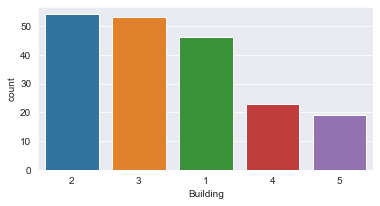

In [35]:
sns.countplot(x='Building', data=data, order=data['Building'].value_counts().index);

в основном покупали от 1 до 3 зданий

Посчитаем, в каком году совершилось больше всего покупок

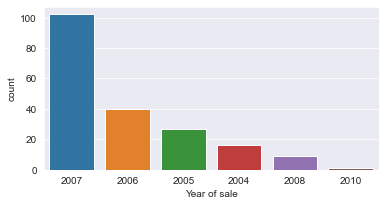

In [40]:
sns.countplot(x='Year of sale', data=data, order=data['Year of sale'].value_counts().index);

больше всего люди покупали в 2007

посмотрим, в каком месяце больше всего покупали

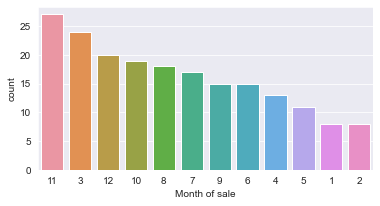

In [57]:
sns.countplot(x='Month of sale',data=data, order=data['Month of sale'].value_counts().index);

больше всего покупок в ноябре, марте и декабре

посмотрим на наличие ипотеки у клиентов

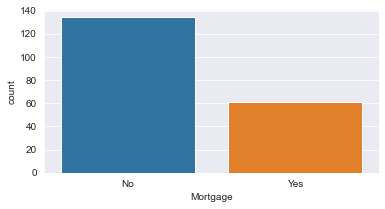

In [43]:
sns.countplot(x='Mortgage',data=data, order=data['Mortgage'].value_counts().index);

примерно в два раза больше покупок совершали клиенты без ипотеки

посмотрим, как оценивали сделку клиенты

<AxesSubplot:xlabel='Deal satisfaction', ylabel='count'>

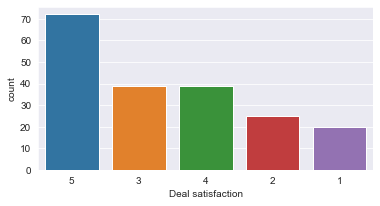

In [52]:
sns.countplot(x='Deal satisfaction', data=data, order=data['Deal satisfaction'].value_counts().index);

видно, что большинство оценок положительных, с преимуществом 5

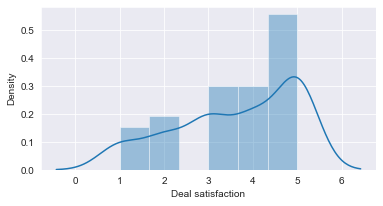

In [55]:
sns.distplot(data['Deal satisfaction']);

посмотрим, на тип покупателя по организации

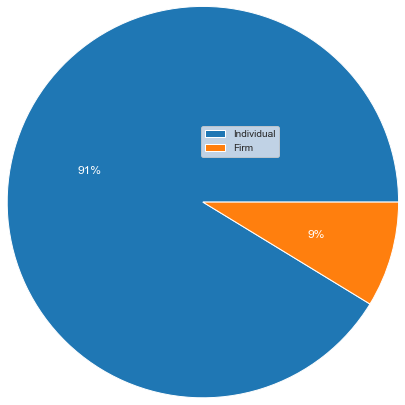

In [59]:
labels=data['Entity'].value_counts().sort_values(ascending=False).index
patches, texts, autotexts=plt.pie(data['Entity'].value_counts(),radius=3, autopct='%.0f%%');
plt.tight_layout()
for ins in autotexts:
    ins.set_color('white')

plt.legend(labels,loc="best")
plt.setp(autotexts, size='large')
plt.show()

в основном покупали индивидуальные клиенты, а не фирмы